In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data_PM10.csv')

In [ ]:
df.head()

,Motor_Ship,Type_of_Load,Docking_Day,Docking_Time,Sailing_Day,Departure_Time,Permanence,Motor_Ship.1,Year_of_Construct,IMO,...,Energy_AE_Hotelling,ME_Cruising,ME_Maniobra,AE_Cruising,AE_Maniobra,AE_Hotelling,Caldera_Maniobra,Caldera_Hotelling,Subtotal_NoCald,Total
0,CAP PORTLAND,CONTENEDORES,1/1/2018,10:10:00 PM,1/2/2018,4:50:00 AM,6:40:00 AM,CAP PORTLAND,2007.0,9344631,...,10834.911700,0.0000,8827.084437,20945.022190,1745.418516,15602.272840,1606.522678,62.329361,47119.79799,48788.65003
1,HANSA AUGSBURG,CONTENEDORES,1/2/2018,4:10:00 PM,1/3/2018,1:00:00 AM,8:50:00 AM,HANSA AUGSBURG,2008.0,9373474,...,11815.677980,191803.6737,6182.587842,16335.913470,1361.326122,17014.576290,1606.522678,82.586403,232698.07740,234387.18650
2,HOHEBANK,CONTENEDORES,1/3/2018,9:45:00 AM,1/3/2018,3:10:00 PM,5:25:00 AM,HOHEBANK,2007.0,9435818,...,4270.957685,140705.2106,3458.612542,12597.462280,1049.788524,6150.179067,1606.522678,50.642606,163961.25300,165618.41830
3,ULTRA CORY,GRANEL,1/1/2018,11:40:00 AM,1/5/2018,6:25:00 PM,6:45:00 AM,ULTRA CORY,2014.0,9675743,...,81570.305450,176729.2814,3666.186033,3458.068146,288.172346,26102.497750,419.092873,250.604681,210244.20560,210913.90320
4,MAERSK WAKAMATSU,CONTENEDORES,1/5/2018,2:00:00 PM,1/6/2018,12:05:00 AM,10:05:00 AM,MAERSK WAKAMATSU,2010.0,9550345,...,12813.363960,286873.7693,6324.054930,27702.440130,2308.536678,18451.244110,1606.522678,94.273159,341660.04510,343360.84090


In [ ]:
# Check the structure of the dataset
print("\nDataset structure:")
print(df.info())


Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Motor_Ship            651 non-null    object 
 1   Type_of_Load          651 non-null    object 
 2   Docking_Day           651 non-null    object 
 3   Docking_Time          651 non-null    object 
 4   Sailing_Day           651 non-null    object 
 5   Departure_Time        651 non-null    object 
 6   Permanence            651 non-null    object 
 7   Motor_Ship.1          651 non-null    object 
 8   Year_of_Construct     650 non-null    float64
 9   IMO                   608 non-null    object 
 10  Max_Speed             651 non-null    float64
 11  Avg_Speed             651 non-null    float64
 12  Gross_tonnage         651 non-null    int64  
 13  Dead_Weight           608 non-null    float64
 14  EM_Fuel               651 non-null    object 
 15  AE_

**Feature Selection**

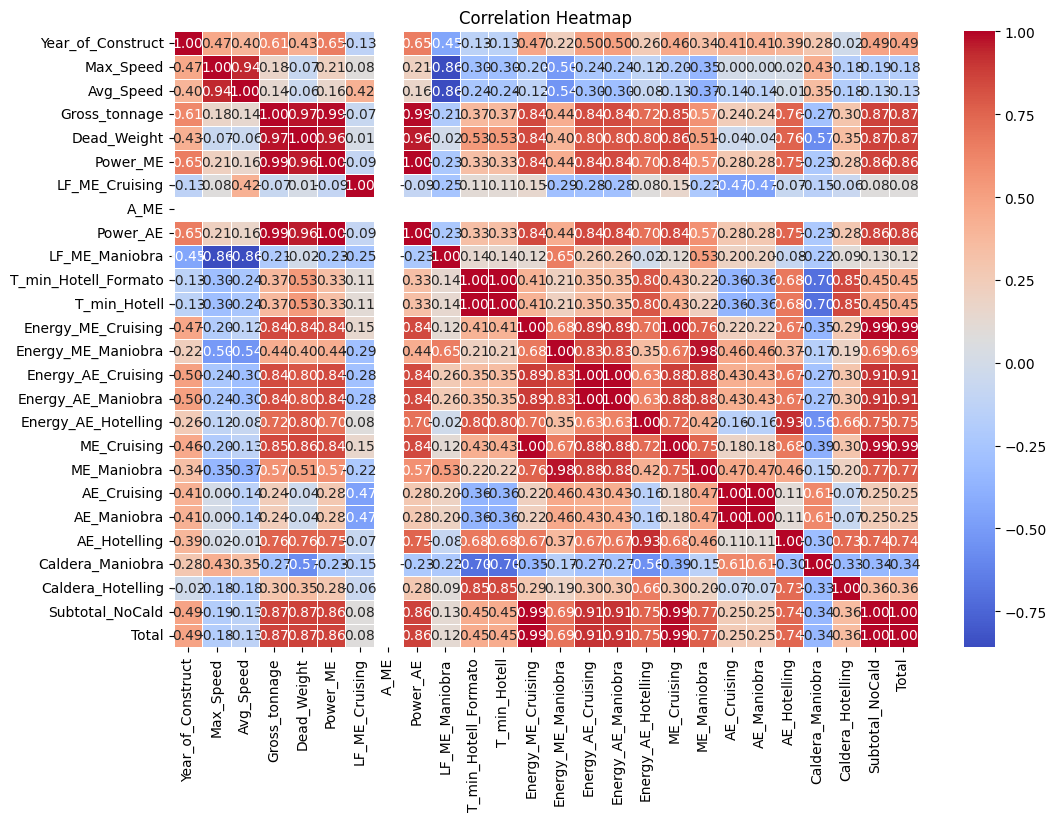

In [ ]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix for numeric columns
corr_matrix = df[numeric_columns].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Compute correlation with the target variable
target_correlation = corr_matrix['Total'].sort_values(ascending=False)

# Display the correlation coefficients
print(target_correlation)

Total                   1.000000
Subtotal_NoCald         0.999997
Energy_ME_Cruising      0.993315
ME_Cruising             0.992338
Energy_AE_Cruising      0.909456
Energy_AE_Maniobra      0.909456
Gross_tonnage           0.868381
Dead_Weight             0.866123
Power_AE                0.864903
Power_ME                0.864902
ME_Maniobra             0.772482
Energy_AE_Hotelling     0.748547
AE_Hotelling            0.743801
Energy_ME_Maniobra      0.689597
Year_of_Construct       0.486614
T_min_Hotell_Formato    0.446721
T_min_Hotell            0.446721
Caldera_Hotelling       0.358098
AE_Cruising             0.253636
AE_Maniobra             0.253636
LF_ME_Maniobra          0.124854
LF_ME_Cruising          0.083370
Avg_Speed              -0.132161
Max_Speed              -0.184026
Caldera_Maniobra       -0.339698
A_ME                         NaN
Name: Total, dtype: float64


In [ ]:
drop_col = ['Motor_Ship.1','Docking_Day','Docking_Time','IMO','Sailing_Day','Departure_Time','Permanence','T_min_Hotell_Formato',	'T_min_Hotell','Caldera_Maniobra',	'Caldera_Hotelling',	'Subtotal_NoCald','ME_Cruising','ME_Maniobra','AE_Cruising',	'AE_Maniobra',	'AE_Hotelling','LF_ME_Cruising','LF_ME_Maniobra','Energy_ME_Cruising','Energy_ME_Maniobra','Energy_AE_Cruising','Energy_AE_Maniobra','Energy_AE_Hotelling','Power_ME','Power_AE']
df.drop(labels=drop_col,axis=1,inplace=True)

In [ ]:
df.head()

,Motor_Ship,Type_of_Load,Year_of_Construct,Max_Speed,Avg_Speed,Gross_tonnage,Dead_Weight,EM_Fuel,AE_Fuel,Engine_Speed,A_ME,Total
0,CAP PORTLAND,CONTENEDORES,2007.0,20.6,18.1,22914,28142.0,RO,RO,MSD,1,48788.65003
1,HANSA AUGSBURG,CONTENEDORES,2008.0,20.2,19.1,18327,23388.0,RO,RO,MSD,1,234387.18650
2,HOHEBANK,CONTENEDORES,2007.0,15.7,14.6,9996,11828.0,RO,RO,MSD,1,165618.41830
3,ULTRA CORY,GRANEL,2014.0,13.0,11.9,34794,61442.0,RO,MGO,SSD,1,210913.90320
4,MAERSK WAKAMATSU,CONTENEDORES,2010.0,11.8,10.7,17280,21446.0,RO,RO,MSD,1,343360.84090


In [ ]:
# Summary statistics for numerical features
print("\nSummary statistics for numerical features:")
print(df.describe())


Summary statistics for numerical features:
       Year_of_Construct   Max_Speed   Avg_Speed  Gross_tonnage   Dead_Weight  \
count         650.000000  651.000000  651.000000     651.000000    608.000000   
mean         2003.761538   12.816283   11.125868   15141.519201  23360.042763   
std            14.620523    3.815032    3.635131    9230.265925  15878.335000   
min          1960.000000    5.600000    5.200000     287.000000    640.000000   
25%          2005.250000    9.400000    7.800000    9994.000000  11846.000000   
50%          2008.000000   12.800000   10.700000   17280.000000  21440.000000   
75%          2010.000000   15.700000   13.900000   19846.000000  28188.250000   
max          2018.000000   21.400000   19.700000   36449.000000  63948.000000   

        A_ME         Total  
count  651.0  6.510000e+02  
mean     1.0  2.800705e+05  
std      0.0  2.009851e+05  
min      1.0  1.450421e+04  
25%      1.0  1.683313e+05  
50%      1.0  2.003872e+05  
75%      1.0  3.960670e

 **Data Cleaning**

In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isna().sum())


Missing values:
Motor_Ship            0
Type_of_Load          0
Year_of_Construct     1
Max_Speed             0
Avg_Speed             0
Gross_tonnage         0
Dead_Weight          43
EM_Fuel               0
AE_Fuel               0
Engine_Speed          0
A_ME                  0
Total                 0
dtype: int64


In [ ]:
# Impute missing values for 'Dead_Weight' with the mean
mean_dead_weight = df['Dead_Weight'].mean()
df['Dead_Weight'].fillna(mean_dead_weight, inplace=True)
# Filling missing values for 'Year_of_Construct' with its mean
df['Year_of_Construct'].fillna(df['Year_of_Construct'].mean(), inplace=True)

In [ ]:
# Check if there are any remaining missing values
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Motor_Ship           0
Type_of_Load         0
Year_of_Construct    0
Max_Speed            0
Avg_Speed            0
Gross_tonnage        0
Dead_Weight          0
EM_Fuel              0
AE_Fuel              0
Engine_Speed         0
A_ME                 0
Total                0
dtype: int64


**DATA PREPROCESSING**

In [ ]:
# DATA PREPROCESSING
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in columns below
df['Motor_Ship']= label_encoder.fit_transform(df['Motor_Ship'])
df['Type_of_Load']= label_encoder.fit_transform(df['Type_of_Load'])
df['EM_Fuel']= label_encoder.fit_transform(df['EM_Fuel'])
df['AE_Fuel']= label_encoder.fit_transform(df['AE_Fuel'])
df['Engine_Speed']= label_encoder.fit_transform(df['Engine_Speed'])

In [ ]:
df.head()

,Motor_Ship,Type_of_Load,Year_of_Construct,Max_Speed,Avg_Speed,Gross_tonnage,Dead_Weight,EM_Fuel,AE_Fuel,Engine_Speed,A_ME,Total
0,43,1,2007.0,20.6,18.1,22914,28142.0,0,1,1,1,48788.65003
1,91,1,2008.0,20.2,19.1,18327,23388.0,0,1,1,1,234387.18650
2,95,1,2007.0,15.7,14.6,9996,11828.0,0,1,1,1,165618.41830
3,216,3,2014.0,13.0,11.9,34794,61442.0,0,0,2,1,210913.90320
4,118,1,2010.0,11.8,10.7,17280,21446.0,0,1,1,1,343360.84090


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df.drop(columns=['Total'])  # Features
y = df['Total']  # Target variable

# Split the data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2022)


**MODEL TRAINING**

**1) Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Train the model
linear_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) Score:", r_squared)


Mean Absolute Error (MAE): 30952.526301506725
Mean Squared Error (MSE): 3364202574.3017197
R-squared (R^2) Score: 0.9279390130557869


**2) Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for tuning
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

# Initialize the Lasso Regression model
lasso_regressor = Lasso(random_state=42)

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(lasso_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_lasso_regressor = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_lasso_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) Score:", r_squared)


Mean Absolute Error (MAE): 30952.52479272345
Mean Squared Error (MSE): 3364202556.7524204
R-squared (R^2) Score: 0.9279390134316916


**3) Neural Network**

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for tuning
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

# Initialize the neural network regressor
neural_network_regressor = MLPRegressor(random_state=42)

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(neural_network_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_neural_network_regressor = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_neural_network_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) Score:", r_squared)


Mean Absolute Error (MAE): 66415.91075380058
Mean Squared Error (MSE): 10112010947.065273
R-squared (R^2) Score: 0.7834014234450617


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**4) Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest regressor
random_forest_regressor = RandomForestRegressor(random_state=42)

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(random_forest_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_random_forest_regressor = grid_search.best_estimator_

# Make predictions on the validation data
y_pred = best_random_forest_regressor.predict(X_test)

# Evaluate the model on the validation data
mse_val = mean_squared_error(y_test, y_pred)
r_squared_val = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Validation MSE:", mse_val)
print("Validation R-squared (R^2):", r_squared_val)

Validation MSE: 2665315952.398868
Validation R-squared (R^2): 0.9429091162597771


**5) XG Boost**

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for tuning
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(random_state=42)

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_regressor = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_xgb_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) Score:", r_squared)


Mean Absolute Error (MAE): 20204.912340065184
Mean Squared Error (MSE): 1570353053.127958
R-squared (R^2) Score: 0.9663631459877986


**MODEL SELECTION**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Dictionary to store evaluation metrics for each model
evaluation_metrics = {}

# Define evaluation metric function
def evaluate_model(model, X, y):
    mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-mse_scores)
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

    mean_rmse = rmse_scores.mean()
    mean_r2 = r2_scores.mean()

    return mean_rmse, mean_r2

# List of trained models
models = {
    "Linear Regression": linear_regressor,
    "Lasso Regression": best_lasso_regressor,
    "Neural Network": best_neural_network_regressor,
    "Random Forest": best_random_forest_regressor,
    "XGBoost": best_xgb_regressor
}

# Evaluate each model
for name, model in models.items():
    rmse, r2 = evaluate_model(model, X_train, y_train)
    evaluation_metrics[name] = {'RMSE': rmse, 'R-squared': r2}

# Print evaluation metrics for each model
for name, metrics in evaluation_metrics.items():
    print(f"Model: {name}")
    print(f"Mean RMSE: {metrics['RMSE']}")
    print(f"Mean R-squared: {metrics['R-squared']}")
    print()

# Select the best model based on RMSE
best_model = min(evaluation_metrics, key=lambda k: evaluation_metrics[k]['RMSE'])
print(f"The best model based on RMSE is: {best_model}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Model: Linear Regression
Mean RMSE: 52099.51120465474
Mean R-squared: 0.9266038517883386

Model: Lasso Regression
Mean RMSE: 52099.5112588105
Mean R-squared: 0.9266038514479881

Model: Neural Network
Mean RMSE: 91476.22280751192
Mean R-squared: 0.7789457740974463

Model: Random Forest
Mean RMSE: 46312.51481464272
Mean R-squared: 0.9415562279423918

Model: XGBoost
Mean RMSE: 45248.691515261795
Mean R-squared: 0.9449897967469475

The best model based on RMSE is: XGBoost


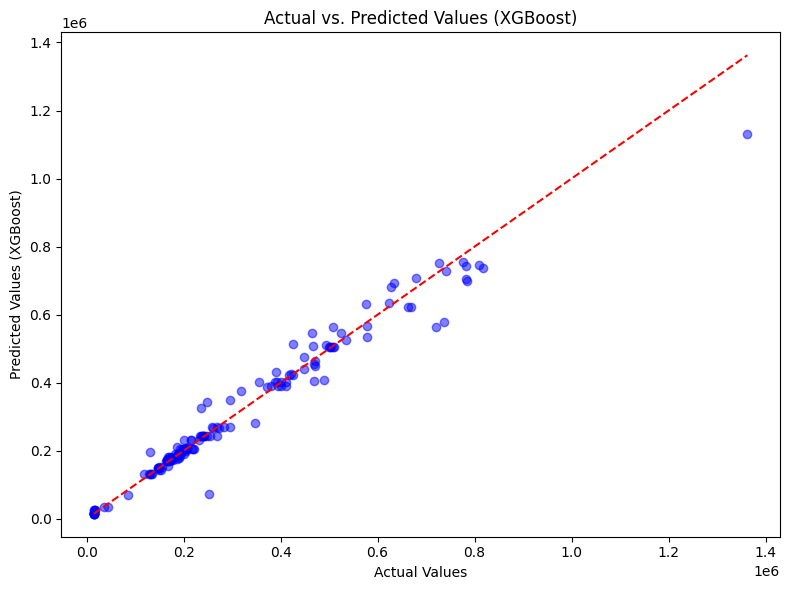

In [ ]:
# Make predictions on the test data using the XGBoost model
y_pred_xgb = best_xgb_regressor.predict(X_test)

# Plot actual vs. predicted values for XGBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (XGBoost)')
plt.title('Actual vs. Predicted Values (XGBoost)')
plt.tight_layout()
plt.show()


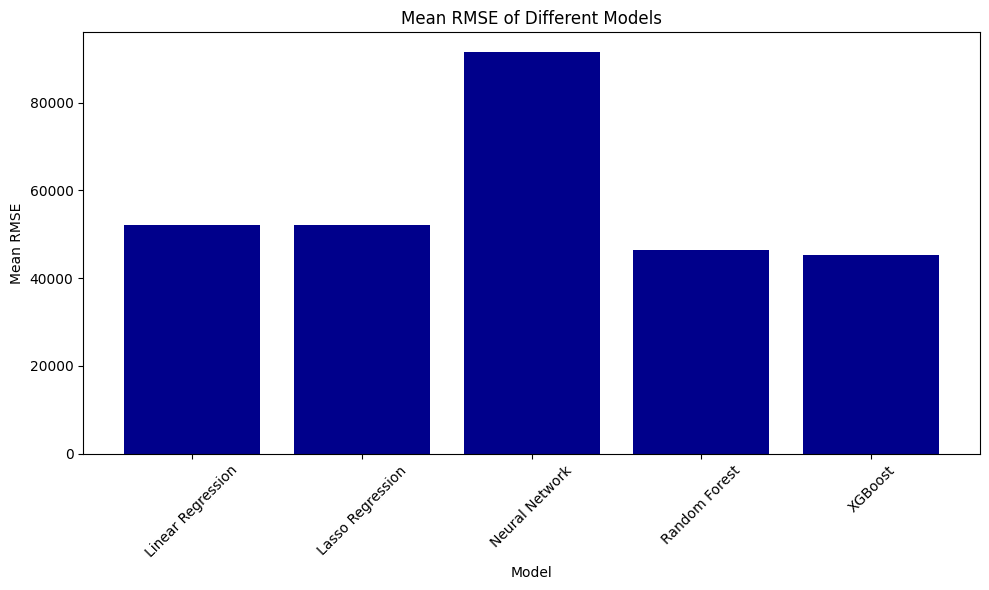

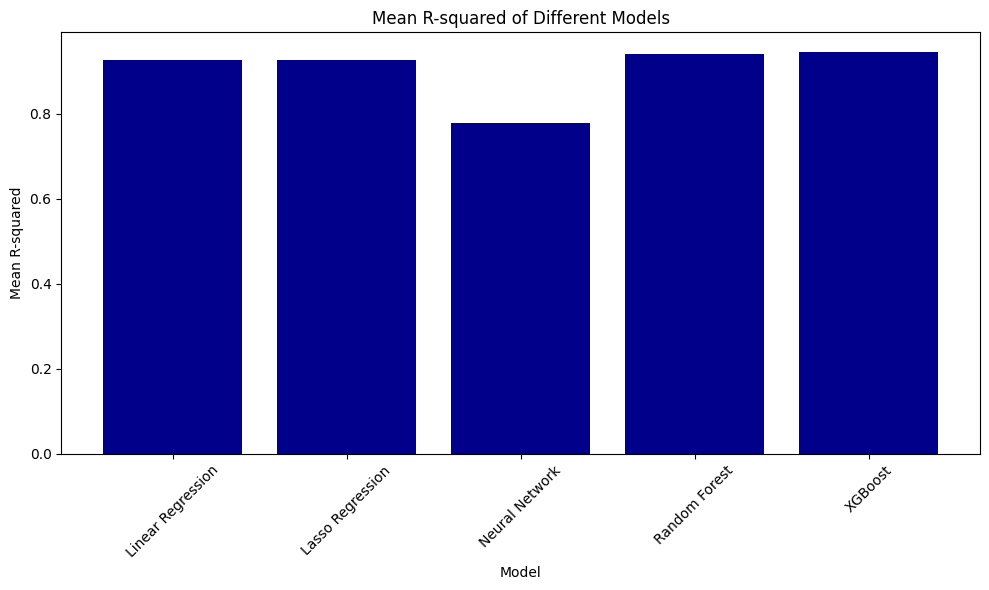

In [ ]:
import matplotlib.pyplot as plt

# Extract evaluation metrics for plotting
models_names = list(evaluation_metrics.keys())
mean_rmse_values = [metrics['RMSE'] for metrics in evaluation_metrics.values()]
mean_r2_values = [metrics['R-squared'] for metrics in evaluation_metrics.values()]

# Plot mean RMSE
plt.figure(figsize=(10, 6))
plt.bar(models_names, mean_rmse_values, color='darkblue')
plt.xlabel('Model')
plt.ylabel('Mean RMSE')
plt.title('Mean RMSE of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot mean R-squared
plt.figure(figsize=(10, 6))
plt.bar(models_names, mean_r2_values, color='darkblue')
plt.xlabel('Model')
plt.ylabel('Mean R-squared')
plt.title('Mean R-squared of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
